# Titanic

El hundimiento del Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de chocar con un iceberg, matando a miles de personas. Esta tragedia sensacional conmocionó a la comunidad internacional y condujo a mejores normas de seguridad aplicables a los buques. Una de las razones por las que el naufragio dio lugar a semejante cantidad de muertes fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrada en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

El siguiente dataset proporciona información sobre el destino de los pasajeros en el viaje fatal del trasatlántico Titanic, que se resume de acuerdo con el nivel económico (clase), el sexo, la edad y la supervivencia.

In [42]:
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
from pydataset import data

In [58]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [3]:
# importando dataset
titanic = data('titanic')

In [5]:
# ver primeros 10 registros
titanic.head(10)

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
6,1st class,adults,man,yes
7,1st class,adults,man,yes
8,1st class,adults,man,yes
9,1st class,adults,man,yes
10,1st class,adults,man,yes


### Tabla de frecuencias

In [6]:
# tabla de frecuencia para contar las diferentes clases de pasajeros
pd.value_counts(titanic['class'])

3rd class    706
1st class    325
2nd class    285
Name: class, dtype: int64

### Tabla de frecuencias relativas

In [8]:
# Para saber el porcentaje de pasajeros por clase realizamos una tabla de frecuencia relativa
100 * titanic['class'].value_counts() / len(titanic['class'])

3rd class    53.647416
1st class    24.696049
2nd class    21.656535
Name: class, dtype: float64

### Gráficos para representar variables Categóricas

#### Barras

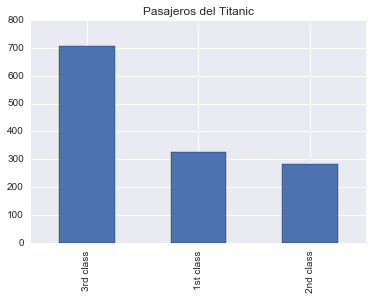

In [10]:
# Gráfico de barras de pasajeros del Titanic
plot = titanic['class'].value_counts().plot(kind='bar',
                                            title='Pasajeros del Titanic')

#### Tartas

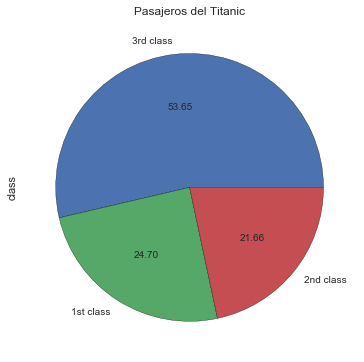

In [13]:
# Gráfico de tarta de pasajeros del Titanic
plot = titanic['class'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Pasajeros del Titanic')

### Asociación - Tablas de Contingencia

¿Existe alguna relación entre la clase de pasajeros y la posibilidad de alcanzar un bote salvavidas y sobrevivir a la tragedia?

In [36]:
# Tabla de contingencia class / survived
pd.crosstab(index=titanic['survived'],
            columns=titanic['class'], margins=True)

class,1st class,2nd class,3rd class,All
survived,,,,
no,122,167,528,817
yes,203,118,178,499
All,325,285,706,1316


In [19]:
# tabla de contingencia en porcentajes relativos segun clase
pd.crosstab(index=titanic['survived'], columns=titanic['class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

class,1st class,2nd class,3rd class
survived,,,
no,37.538462,58.596491,74.787535
yes,62.461538,41.403509,25.212465


Este último resultado lo podríamos representar visualmente con simples gráfico de barras del siguiente modo:

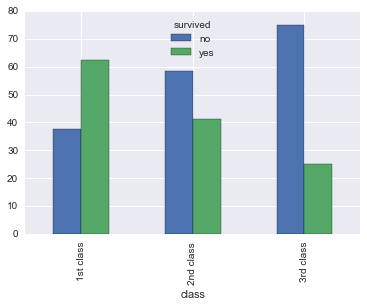

In [20]:
# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['class'],
            columns=titanic['survived']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

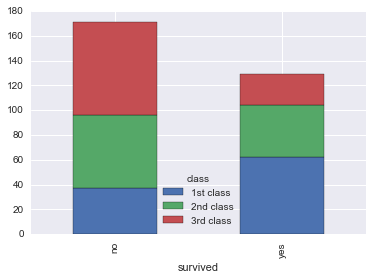

In [21]:

# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['survived'],
            columns=titanic['class']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

Vemos que sí existe una relación entre la clase y las personas que sobrevivieron. 

In [75]:
chi2_contingency(pd.crosstab(index=titanic['survived'],
            columns=titanic['class'], margins=True))

(133.05203598610018,
 2.9249941496115534e-26,
 6L,
 array([[  201.76671733,   176.93389058,   438.2993921 ,   817.        ],
        [  123.23328267,   108.06610942,   267.7006079 ,   499.        ],
        [  325.        ,   285.        ,   706.        ,  1316.        ]]))